<a href="https://colab.research.google.com/github/Owlmanandy/ATMS-421-Projects/blob/master/ESM_Assignment_2_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Earth Systems Modeling</h1>
<h2>Assignment 2: Plotting and Model Validation [60 pts]</h2>
<p>In this assignment you will ...
<ul>
<li>Build upon your Python plotting skills by opening and plotting real LIDAR data file from NASA JPL.</li>
<li>Take a closer look at unit conventions and conversions in the Earth and Atmospheric Sciences.</li>
<li>Learn the difference between measured, retrieved, and derived observations.</li>
<li>Look at the discrepancy between the pressure predicted by the hydrostatic balance model and actual atmospheric pressure.</li>
<li>Refine your understanding of observed data, and modeled data and how the two types of data are used together to advance scientific understanding.</li>
<li>Practice building upon your prior work, while saving time and leveraging the modularity of Python functions!</li>
<li>Perform a simple model validation, and critique the model used.</li>
</ul>
</p>

<h3>Problem 1: Plotting LIDAR Data [40 pts]</h3>
<h4>Part 1: Get META. Before working with real data, it's a good idea to open it and explore. [5 pts]</h4>
<p>You don't need to read it line by line in python- just try double clicking on the downloaded file to open it with notebook/notes etc. Please answer the following questions.</p>
<ul><li>Where is the measurement station located? (Answer with the Latitude and Longitude as well as place name.) [1 pt]</li>
        <li>What is the independent variable used in the measurement? What are the units of the independent variable? [1 pt]</li>
        <li>What is being measured? What are the units? (Hint: There are a few things being "measured", but you only need to write down at least two of them. Ozone only counts once. Look at the wikipedia article if you are still confused to see what the LIDAR can measure! <a href="https://en.wikipedia.org/wiki/Lidar">https://en.wikipedia.org/wiki/Lidar</a> [see Design section]) [2 pts]</li>
<li>In your own words, describe the difference between a direct measurement and a derived measurement? An atmospheric scientist would refer to this ozone vertical profile retrieval. What do you think this means? [1 pts] </li>
</ul>http://www.atmosp.physics.utoronto.ca/SPARC/SPARCReport1/1.06_Lidar/1.06_Lidar.html

YOUR ANSWER

Location: 34.3800N, -117.680W, or roughly at Big Pines, California, near LA (the Table Mountain Facility).

The indepedent variable is the altitude above sea level, measured in meters.

What's being measured is the Ozone Number Density presumably in units of molecules per cubic meter.  This tells us how many molecules of ozone there are in a given pocket of air.  Also being measured is air perssure, in hectopascals, air temperature, in degrees Kelvin, and air number density, also in molecules per cubic meter.  Lidar can measure a ton of other values, too, but these are the main values included in this data sheet.

Direct measurements are values that are able to be given quantitative values from direct observation, such as air temperature.  Derived measurements are measurements that require some sort of calculation or interpretation from other measurements.  In this case, the Ozone mixing ratio is a derived measurement, since it had to be calculated.  We can retrieve values of ozone density from LIDAR systems by, esentially, shooting lasers at the sky and measuring what comes back.  By using LIDAR we can retrieve an ozone vertical profile.  We cannot, however, use this to retrieve the mixing ratio.  That must be derived.

<h4>Part 2: Plotting LIDAR Data [30 pts]</h4>
<p> Please do the following</p>
<ul><li>Open the file o3_lidar_jpl_090419.csv (on Moodle) using Pandas or Numpy. [3 pts]</li>
<li>Make a figure and 3 axes objects by using the pyplot subplots() function to create three side-by-side plots. [5 pts] (See example <a href="https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py">Matplotlib Gallery Example (The plots in the example are stacked, so be sure to change this to side-by-side for your plot.)</a>)</li>
<li>The left side plot should be of Ozone Number Density (molecules $m^{-1}$) versus Altitide. (Try to plot the altitude on the y-axis, this is the meteorological convention.) [3 pts for plotting correct data, 1 pts for axes switch]</li>
<li>The middle plot should be of the Ozone Mixing Ratio (ppb) versus Altitide. (Try to plot the altitude on the y-axis, this is the meteorological convention.) [3 pts for plotting correct data, 1 pt for axes switch]</li>
<li>The right side plot should be of the Air (ppb) versus Altitide. (Try to plot the altitude on the y-axis, this is the meteorological convention.) [3 pts for plotting correct data, 1 pt for axes switch]</li>
<li>Make sure to have a figure title [2 pts], axes labels [6 pts], and to write a figure caption [2 pts]. [10 pts]</li>    
</ul>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Index(['ALT', ' O3ND', ' O3NDUncert', ' O3NDResol', ' Precision', ' ChRange',
       ' O3MR', ' O3MRUncert', ' Press', ' PressUncert', ' Temp',
       ' TempUncert', ' AirND', ' AirNDUncert  ; '],
      dtype='object')


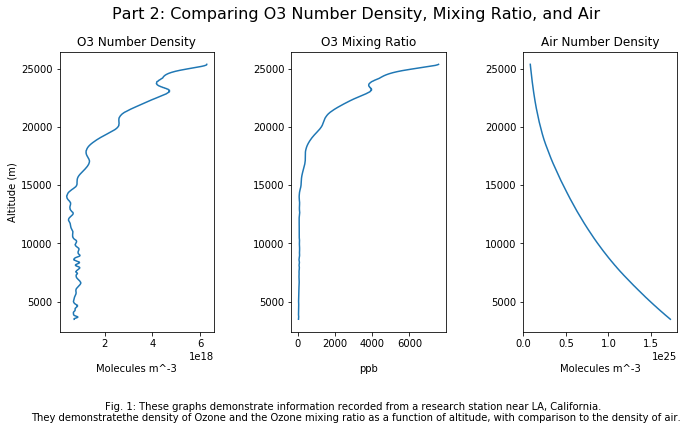

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/U of I/ATMS 421/Assignments/assignment 2/o3_lidar_jpl_090419.csv', sep=',', comment='"')
print(data.keys())

fig, axs = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle('Part 2: Comparing O3 Number Density, Mixing Ratio, and Air', x=0.5, y=1.05, fontsize = 16)
fig.subplots_adjust(wspace=3)

axs[0].plot(data[' O3ND'],data['ALT'])
axs[0].set_title('O3 Number Density')
axs[0].set_ylabel('Altitude (m)')
axs[0].set_xlabel('Molecules m^-3')
axs[0].xaxis.labelpad = 15

axs[1].plot(data[' O3MR'],data['ALT'])
axs[1].set_title('O3 Mixing Ratio')
axs[1].set_xlabel('ppb')
axs[1].xaxis.labelpad = 15

axs[2].plot(data[' AirND'],data['ALT'])
axs[2].set_title('Air Number Density')
axs[2].set_xlabel('Molecules m^-3')
axs[2].xaxis.labelpad = 15

fig.text(.5,-0.1,'Fig. 1: These graphs demonstrate information recorded from a research station near LA, California.  \nThey demonstrate' +\
         'the density of Ozone and the Ozone mixing ratio as a function of altitude, with comparison to the density of air.',ha='center')

fig.tight_layout()
plt.show()

<h4>Part 3: Derived Data. Mixing Ratios. [5 pts]</h4>
<p>In the dataset you have, the number concentrations are not directly measured by are retrieved using light intensity measurements and an algorithm (think model) that takes into account the scattering of light, absorption by the species of interest, and more. The Mixing Ratio is found by combining two of these retrieved observations, which is why it has earned the label of derived in the dataset.</p>

<p>In this problem, you are going to derive the mixing ratio using the number densities above to demonstrate that the data are correct. To do this you are going to make a plot with pyplot.subplots again. (You can use some of the code above!) This time you need only one plot.</p>
<ul>
    <li>Make a one-panel figure using subplots. You will use two separate plot commands. [1 pt]</li>
    <li>The first plot command should plot the O3 mixing ratio data from your data set. [1 pt]</li>
    <li>The second plot command (data will appear on top of the other data) should plot a ratio that you calculate: The ozone number density divided by the air number density. Hint: This ratio needs to be multiplied by a large number to place it in parts per billion. [1 pt] </li>
    <li>To better view the fit, sample only every tenth point in your second command by using the NumPy index [::10] on both the calculated array and the altitude array. Make your computed data appear as small points or circles. [1 pt]</li>
    <li>Do not forget axes labels, figure title, and a figure caption.</li>
</ul>

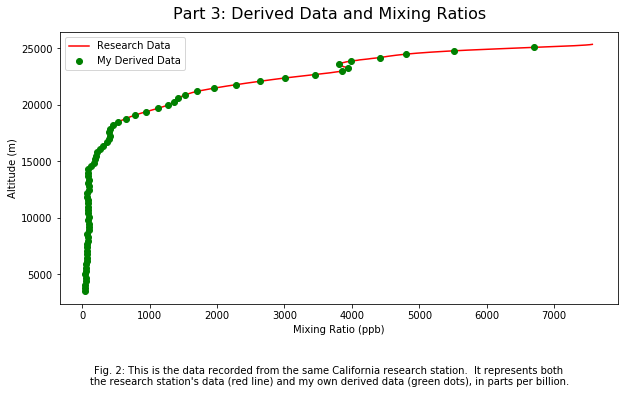

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/My Drive/U of I/ATMS 421/Assignments/assignment 2/o3_lidar_jpl_090419.csv', sep=',', comment='"')

my_mix = (data[' O3ND']/data[' AirND'])*1000000000

fig2, axs2 = plt.subplots(1,1,figsize=(10,5))

axs2.plot(data[' O3MR'],data['ALT'],color='r',label='Research Data')
axs2.plot(my_mix[::10],data['ALT'][::10],'go',label='My Derived Data')
fig2.suptitle('Part 3: Derived Data and Mixing Ratios', x=0.5, y=.95, fontsize = 16)
axs2.set_ylabel('Altitude (m)')
axs2.set_xlabel('Mixing Ratio (ppb)')
axs2.legend()

fig2.text(.5,-0.1, "Fig. 2: This is the data recorded from the same California research station.  It represents both \nthe" +\
         " research station's data (red line) and my own derived data (green dots), in parts per billion.",ha='center')

plt.show()

<h3>Problem 2: Testing Hydrostatic Balance [20 pts]</h3>
<p>In assignment 1, you wrote an equation for the atmospheric pressure based on the principle of hydrostatic balance. Now you get to test the theory against LIDAR measurements. Be sure to open Assignment 1 to access your equation, and paste this equation at the top of your coding cell below. Also, be sure to use the NumPy version of the exponential equation, because it can handle the NumPy arrays nested in your Pandas dataframe object. To call out the NDArray from your data frame, remember to use the form df['key'].values for example a NDArray of altitude would be generated with the statement: data['ALT'].values.</p>

<ul>
<li>Step 1. Load in your equation for atmospheric pressure based on the hydrostatic model. [3 pts]</li>
<li>Step 2. Your data file contains measurements for air pressure and temperature. You can assume the sea level pressure is 101300 Pa for now. (You can acutally use the hydrostatic equation to calculate a better estimate via calibration. In fact it looks like it was a high pressure day for Table Mountain, CA.) Use these data to calculate the air pressure according to hydrostatic balance. [5 pts]</li>
<li>Step 3. Plot the measured air pressure and the hydrostatic model of air pressure together on the same axes, use a legend so that viewers can differentiate the plots easily. Remember to use a title, axes labels, and a caption. [5 pts]</li>
<li>Step 4. Answer the following questions. 
    <ol>
    <li>How does the model compare to the data? [1 pt]</li>
    <li>Where does the model work, where does it fail? [2 pts]</li>
    <li>Does a better estimate of surface pressure change the overall model fit much? [2 pts]</li>
    <li>All measurements have uncertainty, what could you do to visualize the uncertainty the in air pressure measurements to get a better feel for how well the model fits your data? [2 pts]</li>
    </ol>
<li>Extra Credit: Plot the uncertainty in your air pressure using error bars. [5 pts] </li></ul>


YOUR ANSWER

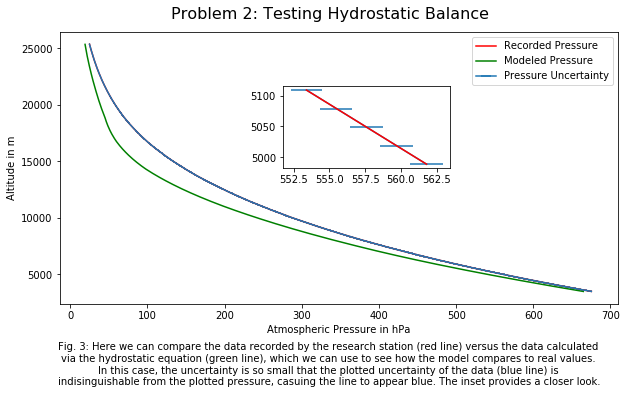

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

def atms_pres(po,alt,temp):
  H = (8.314 * temp) / (0.029 * 9.8)
  return po * np.exp(-alt/H)

data = pd.read_csv('/content/drive/My Drive/U of I/ATMS 421/Assignments/assignment 2/o3_lidar_jpl_090419.csv', sep=',', comment='"')
#print(data.keys())

df_alt = data['ALT'].values
df_temp = data[' Temp'].values

my_data = atms_pres(1013,df_alt,df_temp)

fig3, axs3 = plt.subplots(1,1,figsize=(10,5))

axs3.plot(data[' Press'],data['ALT'],color='r',label='Recorded Pressure')
axs3.plot(my_data,data['ALT'],color='g',label='Modeled Pressure')
axs3.errorbar(data[' Press'],data['ALT'],xerr=data[' PressUncert'],label='Pressure Uncertainty',)

axs3.legend()
fig3.suptitle('Problem 2: Testing Hydrostatic Balance',x=0.5, y=.95, fontsize = 16)
axs3.set_xlabel('Atmospheric Pressure in hPa')
axs3.set_ylabel('Altitude in m')

fig3.text(.5,-0.1, "Fig. 3: Here we can compare the data recorded by the research station (red line) versus the data calculated \nvia" +\
         " the hydrostatic equation (green line), which we can use to see how the model compares to real values. \nIn this case, the uncertainty is" +\
         " so small that the plotted uncertainty of the data (blue line) is \nindisinguishable from the plotted pressure, casuing the line to appear blue. The inset provides a closer look." ,ha='center')

ax1 = plt.axes([0,0,1,1])
ip = InsetPosition(axs3, [0.4,0.5,0.3,0.3])
ax1.set_axes_locator(ip)

ax1.plot(data[' Press'][50:55],data['ALT'][50:55],color='r',label='Recorded Pressure',zorder=10)
ax1.errorbar(data[' Press'][50:55],data['ALT'][50:55],xerr=data[' PressUncert'][50:55],label='Pressure Uncertainty')


plt.show()


QUESTIONS:
1. The model regularly underestimates the atmospheric pressure in this case.  For every data point that I can pick out, the modeled value is a little bit (or a lot) lower than the actual recorded pressure.
2. The model is successful in getting the general shape of the line, or the overall trend and roughly where the curves of the line are.  It is also more accurate at lower altitudes than at higher ones.  It fails, however, in predicting the actual values, and is anywhere from 1 to 50 hPa off at any given time.
3. I played around with different surface level values, using numbers as high at 1050 hpa and as low as 950 hpa, and it made very little change to the model.  I think that surface value is one of those parameters in models that has minimal effect on the outcome of the model, as long as it's within a reasonable range.  Increasing the surface pressure made the model more accurate to a certain degree, while decreasing the surface pressure lowered the model's accuracy.
4. To show the uncertainty, I could include error bars in the graph, perhaps at ever 10th or 20th data point in order to get the general trend of uncertainty without overcrowding the data.  This would be easy for the recorded data, since the uncertainty is given.  For the measured data, however, I am unsure how to convert the given uncertainties of altitude and temperature into an uncertainty that represents my measured dataset as a whole.  Or is this question just asking to model the uncertainty present in the initial data?